In [1]:
import torch

In [2]:
torch.cuda.is_available()

False

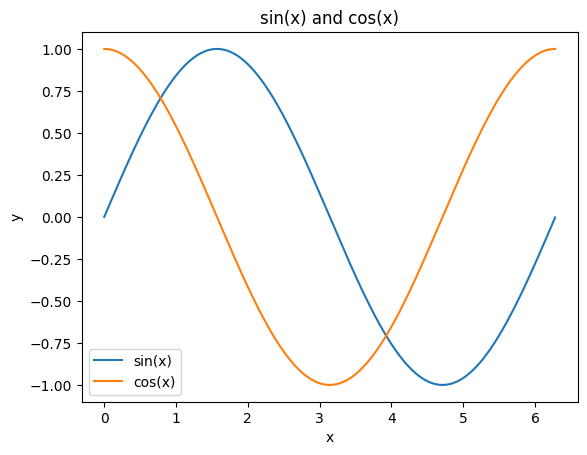

In [3]:
# draw a graph of sin(x) and cos(x)
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2*np.pi, 0.01)
y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, label='sin(x)')
plt.plot(x, z, label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('sin(x) and cos(x)')
plt.legend()
plt.show()


In [ ]:
# a twitter client to post a tweet from a text file
import tweepy

# Twitter API credentials

# create an OAuthHandler instance
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Twitter requires all requests to use OAuth for authentication

# access tokens and secret
access_token = "..."

# access token secret

access_token_secret = "..."


# set access token and secret
auth.set_access_token(access_token, access_token_secret)

# create tweepy API object to fetch tweets
api = tweepy.API(auth)

# open text file
my_file = open('my_tweet.txt', 'r')

# read lines one by one from my_file and post each line as a tweet
for line in my_file:
    print(line)
    api.update_status(line)
    time.sleep(900) # 15 minute sleep time

# close the file
my_file.close()


